### Score: `[99]`

Q1. `[25]` good! 1.2删去了过多数据！

Q2. `[10]` good!

Q3. `[49]` 3.9异常值需注意。

Q4. `[15]`   your findings。

In [1]:
p1_path = '..\Assignment2_common_files\earthquakes.tsv'
p2_path = '..\Assignment2_common_files\Baoan_Weather_1998_2022.csv'

# 1.Significant earthquakes since 2150 B.C.

In [2]:
import pandas as pd   
import matplotlib.pyplot as plt  

file_path = p1_path

Sig_Eqs = pd.read_csv(file_path, sep='\t')  

# 1.1
# 打印数据的前几行，看数据输入是否正确 
#print(Sig_Eqs.head())

# 按国家分组并求死亡人数之和  
deaths_by_country = Sig_Eqs.groupby('Country')['Deaths'].sum().reset_index()  

# 根据总死亡人数降序排序并取前二十  
top_deaths = deaths_by_country.sort_values(by='Deaths', ascending=False).head(20)  

# 重置索引  
top_deaths = top_deaths.reset_index(drop=True)

# 打印前 20个国家的总死亡人数  
print(top_deaths)

         Country     Deaths
0          CHINA  2075947.0
1         TURKEY  1188881.0
2           IRAN  1011453.0
3          ITALY   498418.0
4          SYRIA   439224.0
5          HAITI   323478.0
6     AZERBAIJAN   317219.0
7          JAPAN   279607.0
8        ARMENIA   191890.0
9       PAKISTAN   145083.0
10          IRAQ   136200.0
11       ECUADOR   135496.0
12  TURKMENISTAN   117412.0
13          PERU   102169.0
14        ISRAEL    90388.0
15      PORTUGAL    83572.0
16        GREECE    80378.0
17         CHILE    64277.0
18         INDIA    63507.0
19        TAIWAN    57153.0


In [3]:
Sig_Eqs

,Search Parameters,Id,Year,Mo,Dy,Hr,Mn,Sec,Tsu,Vol,...,Total Missing,Total Missing Description,Total Injuries,Total Injuries Description,Total Damage ($Mil),Total Damage Description,Total Houses Destroyed,Total Houses Destroyed Description,Total Houses Damaged,Total Houses Damaged Description
0,[],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,1.0,-2150.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,2.0,-2000.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,3.0,-2000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,1.0,NaN,NaN
4,NaN,5877.0,-1610.0,NaN,NaN,NaN,NaN,NaN,3.0,1351.0,...,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6439,NaN,10743.0,2024.0,8.0,8.0,7.0,42.0,55.0,5922.0,NaN,...,NaN,NaN,14.0,1.0,NaN,1.0,1.0,1.0,2.0,1.0
6440,NaN,10744.0,2024.0,8.0,17.0,19.0,10.0,26.0,5923.0,7571.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6441,NaN,10757.0,2024.0,9.0,18.0,2.0,41.0,6.0,NaN,NaN,...,NaN,NaN,75.0,2.0,NaN,3.0,NaN,NaN,700.0,3.0
6442,NaN,10756.0,2024.0,9.0,23.0,23.0,14.0,19.0,5938.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


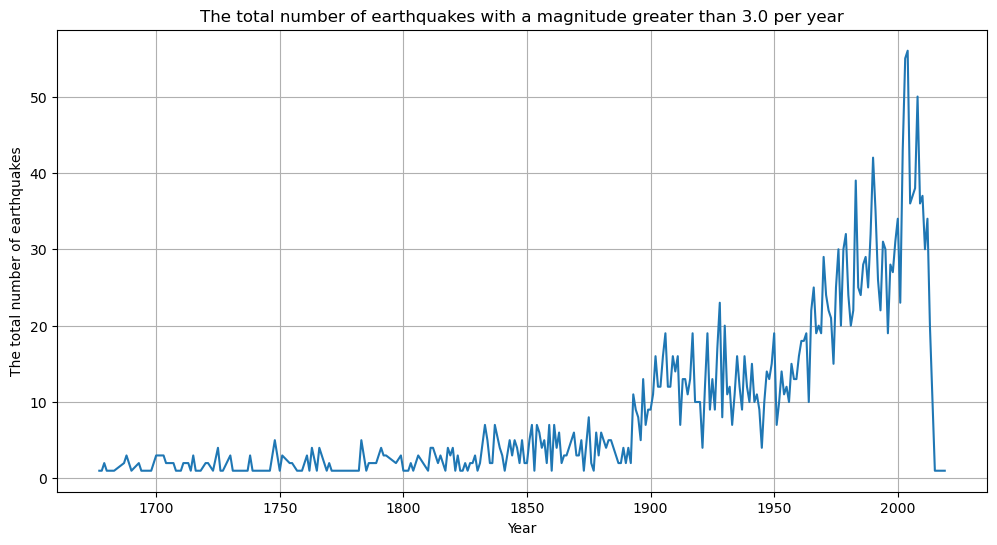

In [ ]:
# 1.2
# 处理缺失的日期列，填充缺失值以避免错误
Sig_Eqs['Year'] = Sig_Eqs['Year'].fillna(0).astype(int)
Sig_Eqs['Mo'] = Sig_Eqs['Mo'].fillna(1).astype(int)
Sig_Eqs['Dy'] = Sig_Eqs['Dy'].fillna(1).astype(int)

# 构造完整的日期列，忽略无效日期
Sig_Eqs['date'] = pd.to_datetime(
    Sig_Eqs[['Year', 'Mo', 'Dy']].rename(columns={'Year': 'year', 'Mo': 'month', 'Dy': 'day'}),
    errors='coerce')
# NOTE: 这样删去月/日 不完整的方法导致1665（不确定具体年份）的数据全被删除
# 提取年份
Sig_Eqs['year'] = Sig_Eqs['date'].dt.year

# 筛选震级大于 3.0 的地震，并按年份统计数量  
earthquakes_above_3 = Sig_Eqs[Sig_Eqs['Ms'] > 3.0]  
earthquakes_per_year = earthquakes_above_3.groupby('year').size()  

# 绘制时间序列图  
plt.figure(figsize=(12, 6))  
earthquakes_per_year.plot()  
plt.title('The total number of earthquakes with a magnitude greater than 3.0 per year')  
plt.xlabel('Year')  
plt.ylabel('The total number of earthquakes')  
plt.grid()  
plt.show()

####   观察3.0级以上地震总数的时间序列图，我发现地震总数的分布非常混乱且不规则的，但有一个总体趋势。1880年之前，地震总数相对较少，但从1880年至今，地震总数呈上升趋势。我猜测原因是因为过去对地震的监测手段较少，记录也相对较少且难以留存到现在，而现代对地震监测和记录更为全面和详细，所以导致了这样的结果。

In [ ]:
# 1.3
# NOTE: 可以再看一下题目，输入国家 def CountEq_LargestEq(df，country):
# 用缺失值重新定义函数
def CountEq_LargestEq(df):
    # 通过清理前后的空字符来清理列名
    df.columns = df.columns.str.strip()

    # 定义一个列表来存储国家及其结果
    results = []

    # 按国家分组，分别处理每个国家的数据
    for country, group in df.groupby('Country'):
        # 删除 'Mag' 缺失的行，避免搜索中出现错误
        group = group.dropna(subset=['Mag'])

        # 计算去除 NaN 后国家的地震总数
        total_eqs = group.shape[0]
        
        # 仅当存在具有有效 'Mag' 值的才继续计算
        if total_eqs > 0:
            # 确定最大地震震级
            max_eq = group.loc[group['Mag'].idxmax()]
            max_magnitude = max_eq['Mag']

            # 检查日期列中的缺失值，并相应地格式化日期字符串
            year = max_eq['Year']
            month = f"{int(max_eq['Mo']):02}"
            day = f"{int(max_eq['Dy']):02}"
            max_date = f"{year}-{month}-{day}"

            # 获取位置名称（如果存在），否则设置为 'Uknowm'
            max_location = max_eq['Location Name']

            # 将结果添加为字典
            results.append({
                'Country': country,
                'Total Earthquakes': total_eqs,
                'Max Magnitude': max_magnitude,
                'Max Date': max_date,
                'Max Location': max_location
            })

    # 将结果转换为 DataFrame ，并按 '总地震数' 降序排序
    results_df = pd.DataFrame(results).sort_values(by='Total Earthquakes', ascending=False)
    return results_df

results_df = CountEq_LargestEq(Sig_Eqs)

# 重置索引  
results_df = results_df.reset_index(drop=True)

results_df.head(10)

,Country,Total Earthquakes,Max Magnitude,Max Date,Max Location
0,CHINA,592,8.5,1668-07-25,CHINA: SHANDONG PROVINCE
1,JAPAN,356,9.1,2011-03-11,JAPAN: HONSHU
2,INDONESIA,332,9.1,2004-12-26,INDONESIA: SUMATRA: ACEH: OFF WEST COAST
3,IRAN,261,7.9,856-12-22,"IRAN: DAMGHAN, QUMIS"
4,USA,227,9.2,1964-03-28,ALASKA
5,TURKEY,216,7.8,1939-12-26,TURKEY: ERZINCAN
6,GREECE,158,8.0,365-07-21,GREECE: CRETE: KNOSSOS
7,PERU,154,8.8,1716-02-06,PERU: PUEBLO DE TORATA IN TACNA
8,CHILE,147,9.5,1960-05-22,"CHILE: PUERTO MONTT, VALDIVIA"
9,RUSSIA,145,9.0,1952-11-04,RUSSIA: KAMCHATKA PENINSULA


# 2. Air temperature in Shenzhen during the past 25 years

<>:5: SyntaxWarning: invalid escape sequence '\E'
<>:5: SyntaxWarning: invalid escape sequence '\E'
C:\Users\86133\AppData\Local\Temp\ipykernel_14592\3540324200.py:5: SyntaxWarning: invalid escape sequence '\E'
  data = pd.read_csv('D:\ESE5023\Baoan_Weather_1998_2022.csv')
C:\Users\86133\AppData\Local\Temp\ipykernel_14592\3540324200.py:5: DtypeWarning: Columns (4,8,9,10,11,14,15,24,25,27,29,31,34,37,38,40,41,45,49,50) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('D:\ESE5023\Baoan_Weather_1998_2022.csv')


       STATION                 DATE  SOURCE REPORT_TYPE CALL_SIGN  \
0  59493099999  1998-01-01T00:00:00       4       SY-MT     ZGSZ    
1  59493099999  1998-01-01T01:00:00       4       FM-15     ZGSZ    
2  59493099999  1998-01-01T02:00:00       4       FM-15     ZGSZ    
3  59493099999  1998-01-01T03:00:00       4       SY-MT     ZGSZ    
4  59493099999  1998-01-01T04:00:00       4       FM-15     ZGSZ    

  QUALITY_CONTROL          AA1  AA2  AA3    AG1  ... REPORT_TYPE.1  SA1  \
0            V020  06,0000,9,1  NaN  NaN  0,000  ...         SY-MT  NaN   
1            V020          NaN  NaN  NaN  0,999  ...         FM-15  NaN   
2            V020          NaN  NaN  NaN  0,999  ...         FM-15  NaN   
3            V020          NaN  NaN  NaN  0,000  ...         SY-MT  NaN   
4            V020          NaN  NaN  NaN  0,999  ...         FM-15  NaN   

       SLP SOURCE.1      TMP  UA1  UG1           VIS WG1             WND  
0  10184,1        4  +0186,1  NaN  NaN  008000,1,N,1 NaN  0

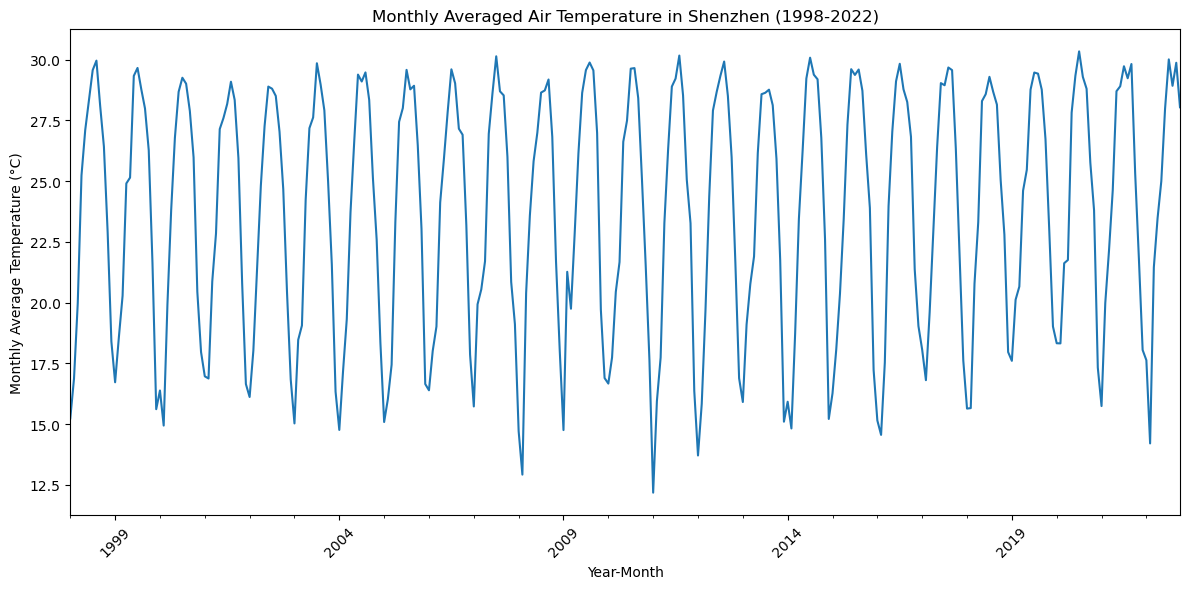

In [ ]:
import pandas as pd  
import matplotlib.pyplot as plt  

data = pd.read_csv(p2_path)   
#print(data.head())  

# 拆分 TMP 列为 'Temperature' 和 'QC'
data[['Temperature', 'QC']] = data['TMP'].str.split(',', expand=True)

# 将 'Temperature' 转换为实际温度值，并将 'QC' 转换为整数类型
data['Temperature'] = pd.to_numeric(data['Temperature'], errors='coerce') / 10
data['QC'] = pd.to_numeric(data['QC'], errors='coerce')

# 去除 Temperature 列中等于 999.9 的行，因为它们表示缺失值
data = data[data['Temperature'] != 999.9]

# 过滤掉不符合质量标准的数据
data = data[(data['QC'] == 0) | (data['QC'] == 1 ) | (data['QC'] == 4 ) | (data['QC'] == 5) | (data['QC'] == 9 )]

# 转换日期列为 datetime 格式
data['DATE'] = pd.to_datetime(data['DATE'], errors='coerce')

# 按照年月计算月平均温度
data['YearMonth'] = data['DATE'].dt.to_period('M')
monthly_avg_temp = data.groupby('YearMonth')['Temperature'].mean()

# 绘制结果
plt.figure(figsize=(12, 6))
monthly_avg_temp.plot()
plt.xlabel('Year-Month')
plt.ylabel('Monthly Average Temperature (°C)')
plt.title('Monthly Averaged Air Temperature in Shenzhen (1998-2022)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### 在处理数据文件的TPM数据时，首先我以逗号为分隔符拆分 TMP 列为 'Temperature' 和 'QC'；然后从user guide可以知道温度的缩放因子是10，所以将 'Temperature' 列的值除以十，转换为实际温度值，并将 'QC' 转换为整数类型；然后去除 Temperature 列中等于 999.9 的行，因为它们表示缺失值；然后过滤掉不符合质量标准的数据，由user guide可以知道，控制代码为0、1、4、5、9且（该值存在）时，温度数据可靠。

#### 过去25年的月平均温度呈年周期性变化，波动范围大致相同，大多在15-30℃之间。

# 3. Global collection of hurricanes

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('D:\ESE5023\ibtracs.ALL.list.v04r00.csv',
                 usecols=range(17),
                 skiprows=[1, 2],
                 parse_dates=['ISO_TIME'],
                 na_values=['NOT_NAMED', 'NAME'])

# 查看数据的前几行
print(df.head())

# 3.1 将 'WMO_WIND' 列转换为数值类型
df['WMO_WIND'] = pd.to_numeric(df['WMO_WIND'], errors='coerce')

# 按 'SID' 分组后，移除 'WMO_WIND' 列中全为 NaN 的分组
df1 = df.groupby('SID').filter(lambda x: x['WMO_WIND'].notna().any())

# 按照风速找到前 10大的飓风
top10_hurricanes = df1.groupby('SID').apply(lambda x: x.loc[x['WMO_WIND'].idxmax()]) \
                     .nlargest(10, 'WMO_WIND')[['NAME', 'WMO_WIND']]
print(top10_hurricanes)
# BUG: 没有dropna，有一个Name=NaN，建议去掉

<>:5: SyntaxWarning: invalid escape sequence '\E'
<>:5: SyntaxWarning: invalid escape sequence '\E'
C:\Users\86133\AppData\Local\Temp\ipykernel_14592\638375338.py:5: SyntaxWarning: invalid escape sequence '\E'
  df = pd.read_csv('D:\ESE5023\ibtracs.ALL.list.v04r00.csv',
C:\Users\86133\AppData\Local\Temp\ipykernel_14592\638375338.py:5: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('D:\ESE5023\ibtracs.ALL.list.v04r00.csv',


             SID  SEASON  NUMBER BASIN SUBBASIN NAME            ISO_TIME  \
0  1842298N11080    1842       1    NI       BB  NaN 1842-10-25 06:00:00   
1  1842298N11080    1842       1    NI       BB  NaN 1842-10-25 09:00:00   
2  1842298N11080    1842       1    NI       BB  NaN 1842-10-25 12:00:00   
3  1842298N11080    1842       1    NI       BB  NaN 1842-10-25 15:00:00   
4  1842298N11080    1842       1    NI       AS  NaN 1842-10-25 18:00:00   

  NATURE      LAT      LON WMO_WIND WMO_PRES WMO_AGENCY TRACK_TYPE  DIST2LAND  \
0     NR  10.8709  79.8265                                    main          0   
1     NR  10.8431  79.3524                                    main          0   
2     NR  10.8188  78.8772                                    main          0   
3     NR  10.8000  78.4000                                    main          0   
4     NR  10.7884  77.9194                                    main          0   

  LANDFALL           IFLAG  
0        0  __________P___ 

C:\Users\86133\AppData\Local\Temp\ipykernel_14592\638375338.py:21: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top10_hurricanes = df1.groupby('SID').apply(lambda x: x.loc[x['WMO_WIND'].idxmax()]) \


C:\Users\86133\AppData\Local\Temp\ipykernel_14592\260137391.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['NAME'] = df2['NAME'].fillna('Unknown')


                   NAME  WMO_WIND
665954  PATRICIA 665954     185.0
665952  PATRICIA 665952     180.0
665956  PATRICIA 665956     180.0
427636     ALLEN 427636     165.0
178209   Unknown 178209     160.0
178210   Unknown 178210     160.0
178212   Unknown 178212     160.0
482074   GILBERT 482074     160.0
552459     LINDA 552459     160.0
605746     WILMA 605746     160.0
689332    DORIAN 689332     160.0
689333    DORIAN 689333     160.0
427618     ALLEN 427618     155.0
427634     ALLEN 427634     155.0
427638     ALLEN 427638     155.0
427648     ALLEN 427648     155.0
482076   GILBERT 482076     155.0
552457     LINDA 552457     155.0
552461     LINDA 552461     155.0
560437     MITCH 560437     155.0


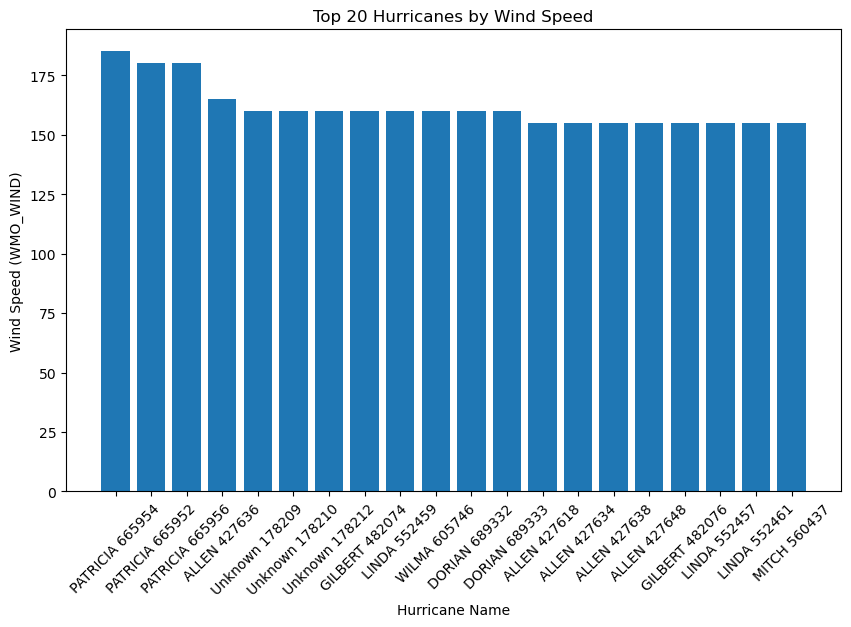

In [108]:
# 3.2过滤掉 'WMO_WIND' 列全为 NaN 的组
df2 = df.dropna(subset=['WMO_WIND'])

# 用占位符替换 'NAME' 列中的 NaN
df2['NAME'] = df2['NAME'].fillna('Unknown')

#  取出前 20大的风速数据并绘制柱状图
top20_hurricanes = df2.nlargest(20, 'WMO_WIND')[['NAME', 'WMO_WIND']]

# 为每种名称添加唯一后缀  
top20_hurricanes['NAME'] = top20_hurricanes['NAME'] + ' ' + top20_hurricanes.index.astype(str)

print(top20_hurricanes)

plt.figure(figsize=(10, 6))
plt.bar(top20_hurricanes['NAME'], top20_hurricanes['WMO_WIND'])
plt.xlabel('Hurricane Name')
plt.ylabel('Wind Speed (WMO_WIND)')
plt.title('Top 20 Hurricanes by Wind Speed')
plt.xticks(rotation=45)
plt.show()

BASIN
WP    236576
SI    160668
SP     67119
EP     62412
NI     55401
SA       119
Name: count, dtype: int64


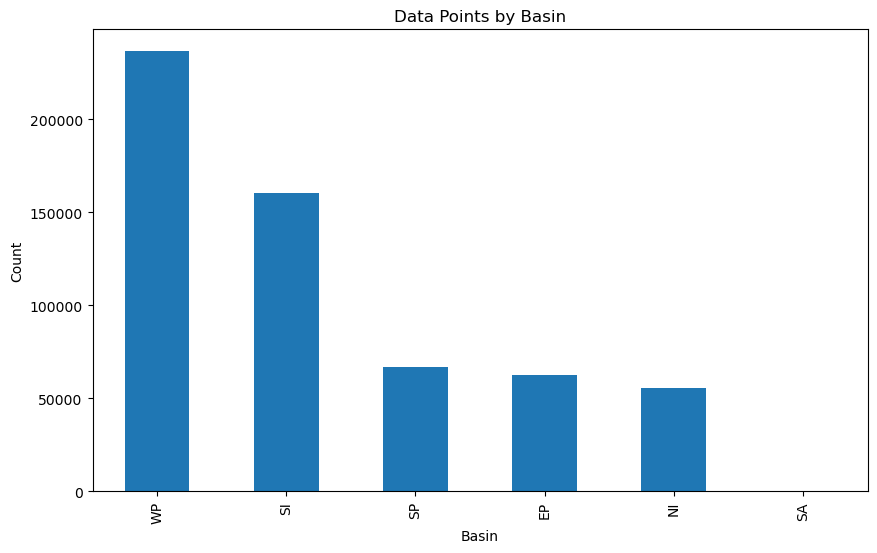

In [106]:
# 3.3 统计各盆地的数据点数并绘制柱状图
basin_counts = df['BASIN'].value_counts()
print(basin_counts)

plt.figure(figsize=(10, 6))
basin_counts.plot(kind='bar')
plt.xlabel('Basin')
plt.ylabel('Count')
plt.title('Data Points by Basin')
plt.show()

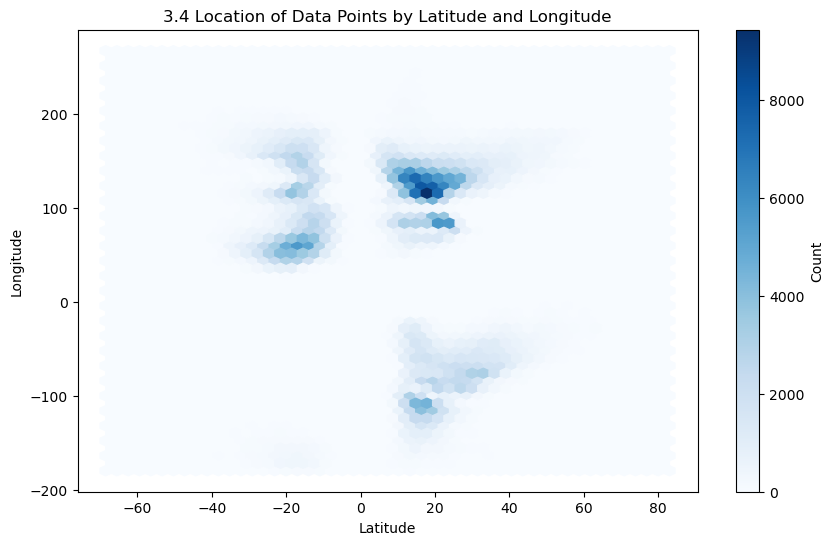

In [44]:
# 3.4 绘制基于纬度和经度的六边形图
plt.figure(figsize=(10, 6))
plt.hexbin(df['LAT'], df['LON'], gridsize=50, cmap='Blues')
plt.colorbar(label='Count')
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.title('3.4 Location of Data Points by Latitude and Longitude')
plt.show()

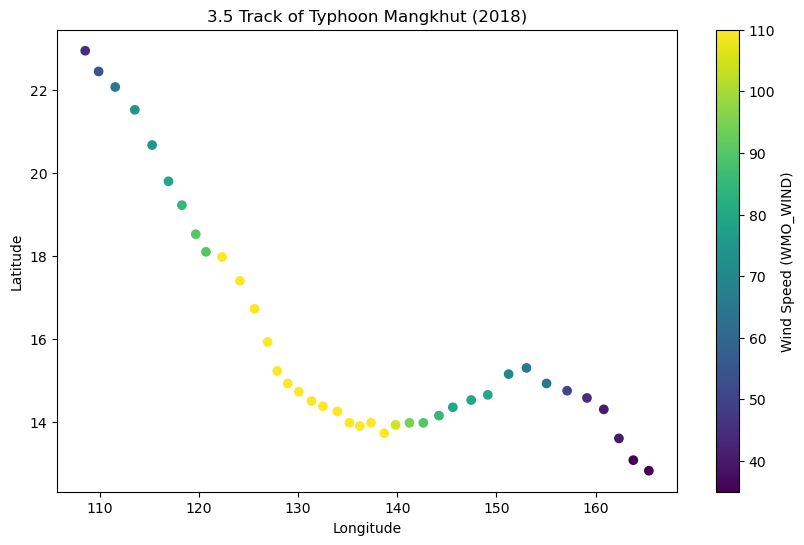

In [50]:
# 3.5 筛选 2018年的台风'山竹'并绘制其路径图
mangkhut = df[(df['NAME'] == 'MANGKHUT') & (df['ISO_TIME'].dt.year == 2018)]
plt.figure(figsize=(10, 6))
plt.scatter(mangkhut['LON'], mangkhut['LAT'], c=mangkhut['WMO_WIND'], cmap='viridis')
plt.colorbar(label='Wind Speed (WMO_WIND)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('3.5 Track of Typhoon Mangkhut (2018)')
plt.show()

In [52]:
# 3.6 筛选 1970年后的 WP和 EP区域数据
filtered_df = df[(df['ISO_TIME'].dt.year >= 1970) & (df['BASIN'].isin(['WP', 'EP']))]
print(filtered_df.head())

                  SID  SEASON  NUMBER BASIN SUBBASIN   NAME  \
350393  1970050N07151    1970      22    WP       MM  NANCY   
350394  1970050N07151    1970      22    WP       MM  NANCY   
350395  1970050N07151    1970      22    WP       MM  NANCY   
350396  1970050N07151    1970      22    WP       MM  NANCY   
350397  1970050N07151    1970      22    WP       MM  NANCY   

                  ISO_TIME NATURE      LAT      LON  WMO_WIND WMO_PRES  \
350393 1970-02-19 00:00:00     TS  7.00000  151.400       NaN     1006   
350394 1970-02-19 03:00:00     TS  7.24752  151.205       NaN            
350395 1970-02-19 06:00:00     TS  7.50000  151.000       NaN     1002   
350396 1970-02-19 09:00:00     TS  7.75747  150.772       NaN            
350397 1970-02-19 12:00:00     TS  8.00000  150.500       NaN      998   

       WMO_AGENCY TRACK_TYPE  DIST2LAND LANDFALL           IFLAG  
350393      tokyo       main       1088     1088  _OO___________  
350394                  main       1109   

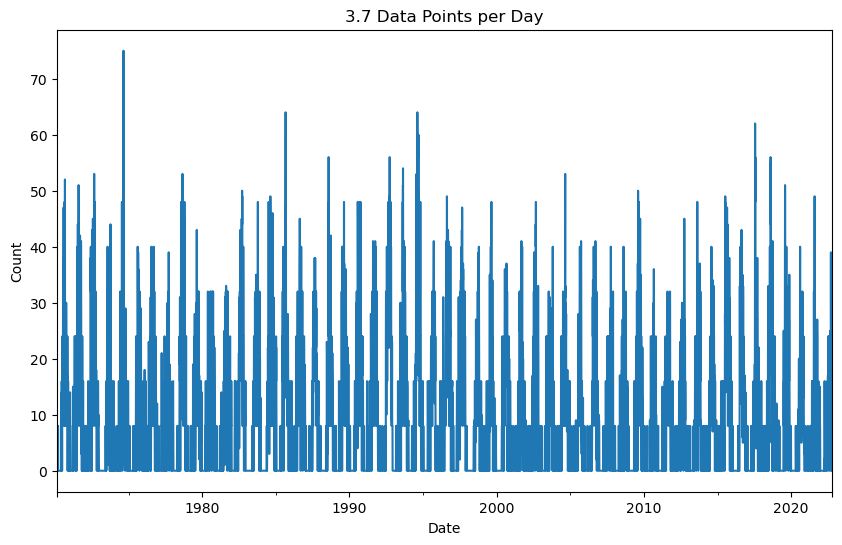

In [54]:
# 3.7 统计每日的数据点数并绘制时间序列图
daily_counts = filtered_df.resample('D', on='ISO_TIME').size()
plt.figure(figsize=(10, 6))
daily_counts.plot()
plt.xlabel('Date')
plt.ylabel('Count')
plt.title('3.7 Data Points per Day')
plt.show()

C:\Users\86133\AppData\Local\Temp\ipykernel_14592\1245553969.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['DayOfYear'] = filtered_df['ISO_TIME'].dt.dayofyear


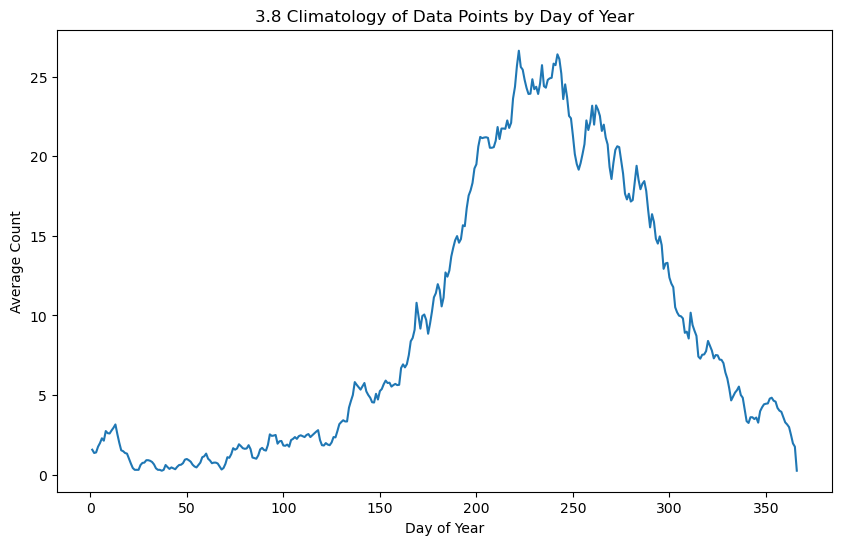

In [56]:
# 3.8 计算每年中的每日平均数据点数（气候学均值）
filtered_df['DayOfYear'] = filtered_df['ISO_TIME'].dt.dayofyear
climatology = filtered_df.groupby('DayOfYear').size() / len(filtered_df['ISO_TIME'].dt.year.unique())
plt.figure(figsize=(10, 6))
climatology.plot()
plt.xlabel('Day of Year')
plt.ylabel('Average Count')
plt.title('3.8 Climatology of Data Points by Day of Year')
plt.show()

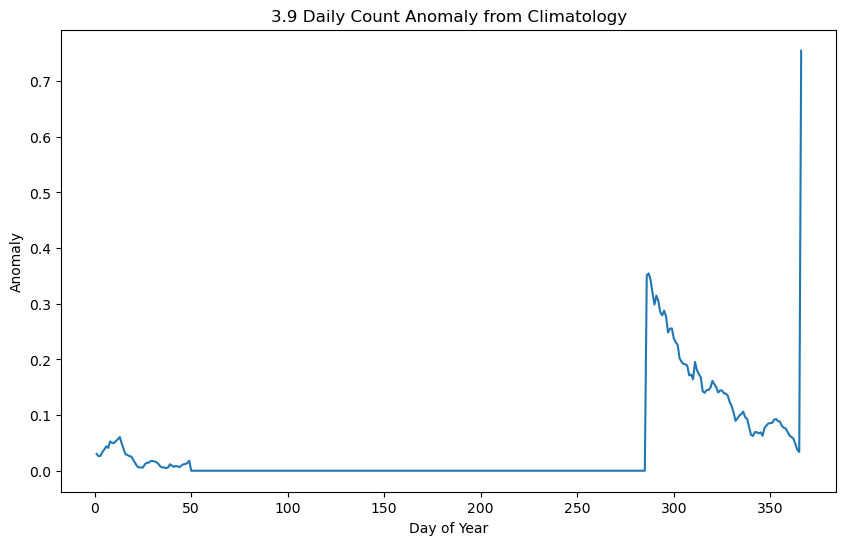

In [ ]:
# 3.9 计算每日数据点数相对于气候学均值的异常值
# BUG here
daily_counts = filtered_df.resample('D', on='ISO_TIME').size()
daily_counts = daily_counts.reindex(pd.date_range(daily_counts.index.min(), daily_counts.index.max(), freq='D'), fill_value=0)
daily_counts.index = daily_counts.index.dayofyear
anomaly = daily_counts.groupby(daily_counts.index).mean() - climatology
plt.figure(figsize=(10, 6))
anomaly.plot()
plt.xlabel('Day of Year')
plt.ylabel('Anomaly')
plt.title('3.9 Daily Count Anomaly from Climatology')
plt.show()

C:\Users\86133\AppData\Local\Temp\ipykernel_14592\3312987246.py:3: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  annual_anomaly = daily_counts.resample('Y').mean() - climatology.mean()


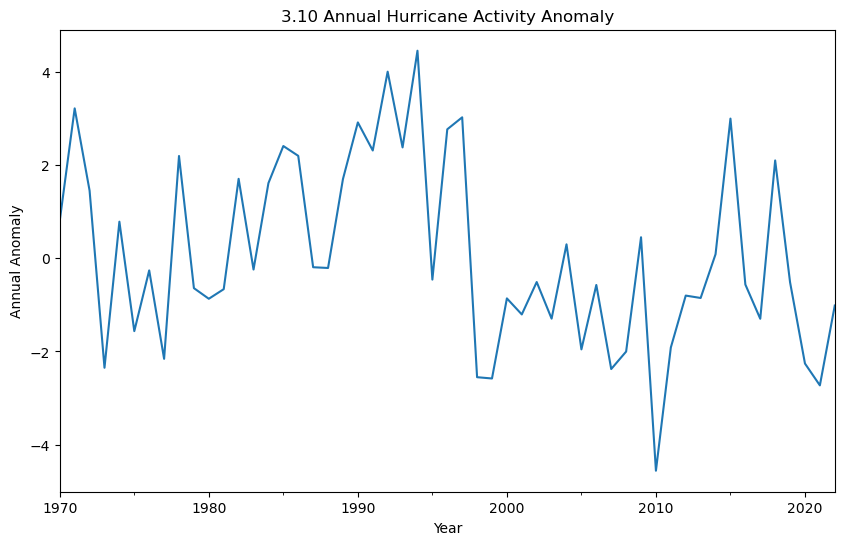

In [61]:
# 3.10 将异常值按年重采样并绘制时间序列图
daily_counts.index = pd.date_range(daily_counts.index.min(), periods=len(daily_counts), freq='D')
annual_anomaly = daily_counts.resample('Y').mean() - climatology.mean()
plt.figure(figsize=(10, 6))
annual_anomaly.plot()
plt.xlabel('Year')
plt.ylabel('Annual Anomaly')
plt.title('3.10 Annual Hurricane Activity Anomaly')
plt.show()

# 4. Explore a data set

Text(0.5, 1.0, 'Time Series of DLY-TAVG-NORMAL')

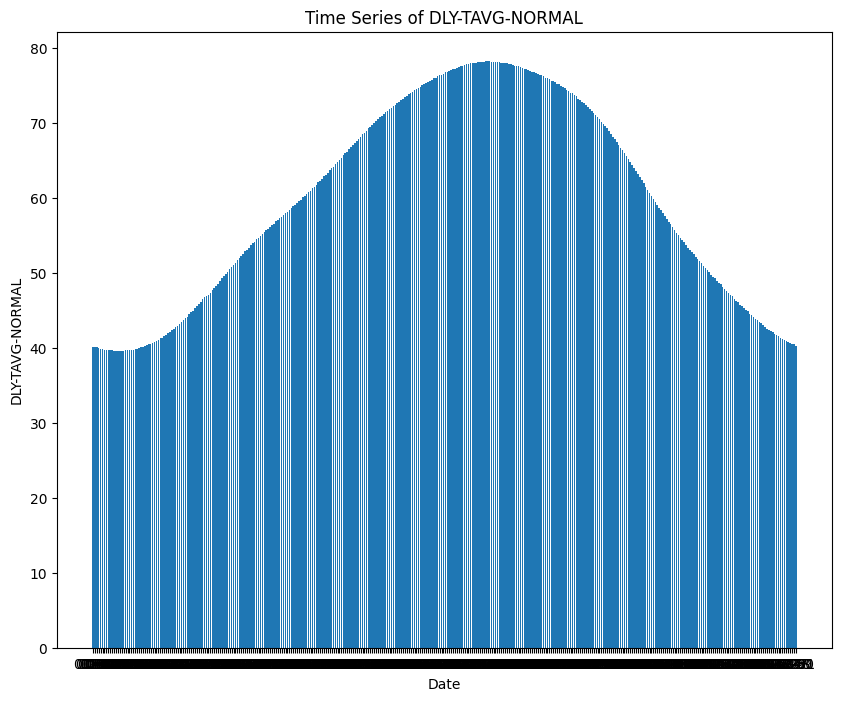

In [4]:
import pandas as pd  
import matplotlib.pyplot as plt  

df = pd.read_csv('USC00010063.csv').fillna(0)  

# 4.2 绘制时间序列
plt.figure(figsize=(10, 8))
plt.bar(df['DATE'], df['DLY-TAVG-NORMAL'])
plt.xlabel('Date')
plt.ylabel('DLY-TAVG-NORMAL')
plt.title('Time Series of DLY-TAVG-NORMAL')

In [85]:
# 4.3 计算统计指标  
mean_value = df['DLY-TAVG-NORMAL'].mean()  
median_value = df['DLY-TAVG-NORMAL'].median()  
variance_value = df['DLY-TAVG-NORMAL'].var()  
max_value = df['DLY-TAVG-NORMAL'].max()  
min_value = df['DLY-TAVG-NORMAL'].min()  
skewness = df['DLY-TAVG-NORMAL'].skew()  
kurtosis = df['DLY-TAVG-NORMAL'].kurt()  
std_dev = df['DLY-TAVG-NORMAL'].std()
  
print(f"均值（平均值）：{mean_value:.2f} °C")  
print(f"中位数：{median_value:.2f} °C")  
print(f"方差：{variance_value:.2f}")  
print(f"最大值：{max_value:.2f} °C")  
print(f"最小值：{min_value:.2f} °C")  
print(f"偏度：{skewness:.2f}")  
print(f"峰度：{kurtosis:.2f}")
print(f"标准差：{std_dev:.2f}")

均值（平均值）：59.70 °C
中位数：59.85 °C
方差：181.71
最大值：78.30 °C
最小值：39.60 °C
偏度：-0.07
峰度：-1.47
标准差：13.48
